# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Analysis

1. When looking at the latitude verus max temperature plot it is displaying a U shaped figure. This can explain that latitude which are around the 20-40 range have higher temperatured compared to other places. This means that areas around the equator have hotter temperatures. 

2. When looking at the max temperatures between the northern and souther hemipheres. There is a negative correlation between a latitude and the temperatures while the southern hemisphere is the opposite. This makes sense because the southern hemisphere is closer to the equator. Therefore, the temperatures are hotter. 

3. For both the northern and southern hemisphere, there seems to be no correlation between the latitude and cloudiness. I can assume that cloudiness is not affected by cloudiness. 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

In [10]:
#empty lists which will be used to perform the api calls and gather data
id = []
list_of_cities  = []
cloudiness = []
countries = []
date_list = []
humidity_cities = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speeds = []
index_counter = 0
set_counter = 1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="




# get the city names and type of weather pattern 




#going through each of the lines and making sure the requests get the index and the cities
for index, city in enumerate(cities, start = 1):
    try:
        #appending to the empty lists
        response = requests.get(query_url + city).json()
        list_of_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_cities.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speeds.append(response["wind"]["speed"])
        #requests dont go over 50
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
        #printing each of the data retrieval methods    
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City was not found")

#displays that the data collection is compelted


Processing Record 1 of Set 1 : campoverde
Processing Record 2 of Set 1 : mahebourg
Processing Record 3 of Set 1 : henties bay
Processing Record 4 of Set 1 : kutum
Processing Record 5 of Set 1 : kaitangata
Processing Record 6 of Set 1 : bambous virieux
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : ribeira grande
Processing Record 9 of Set 1 : dikson
Processing Record 10 of Set 1 : roald
Processing Record 11 of Set 1 : rikitea
Processing Record 12 of Set 1 : hobyo
Processing Record 13 of Set 1 : chokurdakh
Processing Record 14 of Set 1 : barrow
Processing Record 15 of Set 1 : georgetown
Processing Record 16 of Set 1 : blagoyevo
Processing Record 17 of Set 1 : tuktoyaktuk
Processing Record 18 of Set 1 : puerto escondido
Processing Record 19 of Set 1 : klaksvik
Processing Record 20 of Set 1 : upernavik
Processing Record 21 of Set 1 : bredasdorp
Processing Record 22 of Set 1 : uray
Processing Record 23 of Set 1 : adiake
Processing Record 24 of Set 1 : bluff
Processin

In [15]:
weather_info = pd.DataFrame({"cityName":list_of_cities,
                            "country":countries,
                            "lat":lat_list,
                            "lng":lng_list,
                            "temp":max_temp_list,
                            "humidity":humidity_cities,
                            "cloudiness":cloudiness,
                            "winds":wind_speeds})

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
#compiling the dataframe from data scrapping


weather_dict = pd.DataFrame({ 
                "City" : list_of_cities,
                "Cloudiness" : cloudiness,
                "Country" : countries,
                "Date" : date_list,
                "Humidity" : humidity_cities,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speeds
})
weather_dict.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [17]:
weather_dict
#putting weather dictionary into a new csv file
weather_dict.to_csv("output_data/new_cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

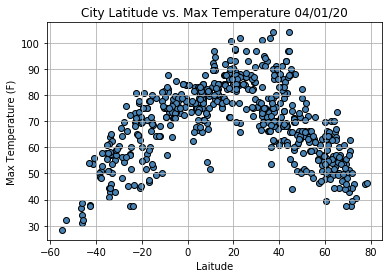

In [18]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature 04/01/20")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid()

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Max Temperature.png")
#have a curved scatter plot

## Latitude vs. Humidity Plot

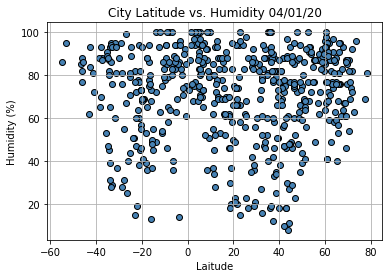

In [19]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity 04/01/20")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid()

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")
#the scatter plots are congregated at the top of the grid and then fall

## Latitude vs. Cloudiness Plot

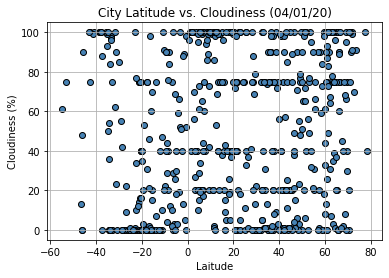

In [20]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid()

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")
#the scatter plots mainly congregate at the top and bottom sections of the grid and then there are some in the middle of the grid

## Latitude vs. Wind Speed Plot

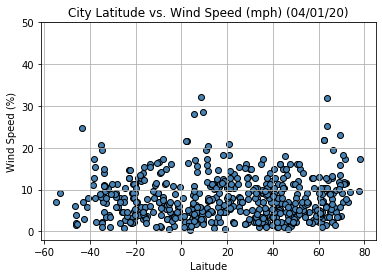

In [21]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid()

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")
#the plots start at the bottom of the grid

## Linear Regression

In [22]:
#making the northern and souther hemisphere dataframes to help determine what is the northern and southern hemispheres

northern_hem = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hem = weather_dict.loc[weather_dict["Lat"] < 0]

In [23]:


import scipy.stats as st
from scipy.stats import linregress

def linear_agression(latitude, variable):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, variable)
    regress_values = latitude * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(latitude, variable)
    plt.plot(latitude,regress_values,"r-")
    
    # The annotate is weird with the xy values, just made it so it sits top right
    plt.annotate(line_eq,(max(latitude)-20,max(variable)-10),fontsize=15,color="red")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

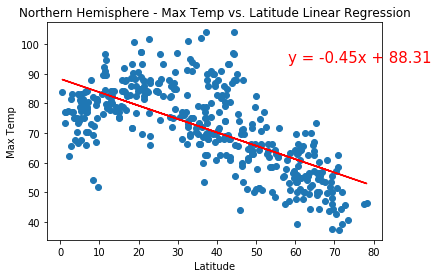

<Figure size 432x288 with 0 Axes>

In [24]:
#equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
#linear_agression(Northern_df["Latitude"],Northern_df["Max Temp"])
linear_agression(northern_hem["Lat"], northern_hem["Max Temp"])
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()


# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

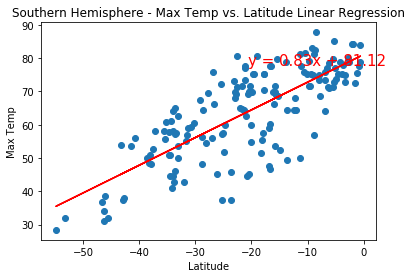

<Figure size 432x288 with 0 Axes>

In [25]:
linear_agression(southern_hem["Lat"],southern_hem["Max Temp"])

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

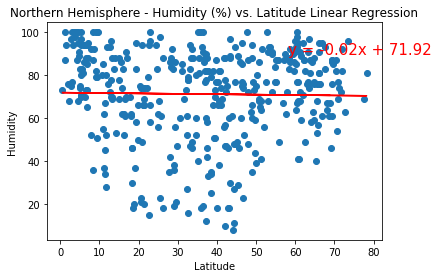

<Figure size 432x288 with 0 Axes>

In [26]:
# Call an function #1
linear_agression(northern_hem["Lat"], northern_hem["Humidity"])

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
# Save the figure
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

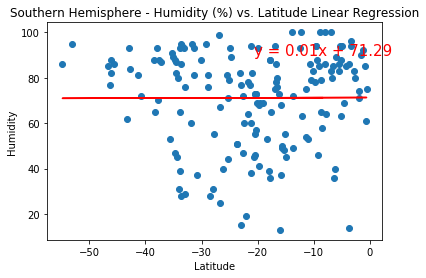

In [27]:
linear_agression(southern_hem["Lat"], southern_hem["Humidity"])

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

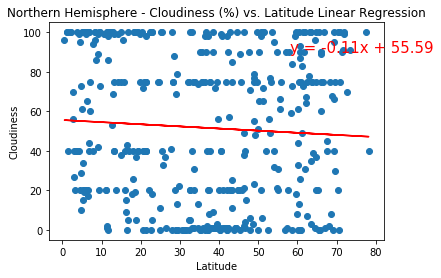

<Figure size 432x288 with 0 Axes>

In [28]:
linear_agression(northern_hem["Lat"], northern_hem["Cloudiness"])

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
# Save the figure
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

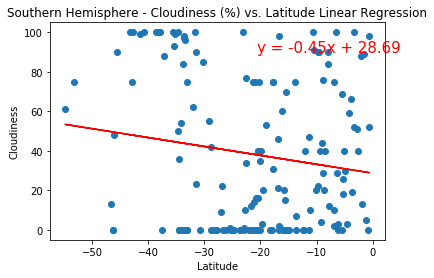

<Figure size 432x288 with 0 Axes>

In [29]:
linear_agression(southern_hem["Lat"], southern_hem["Cloudiness"])

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

# Save the figure
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

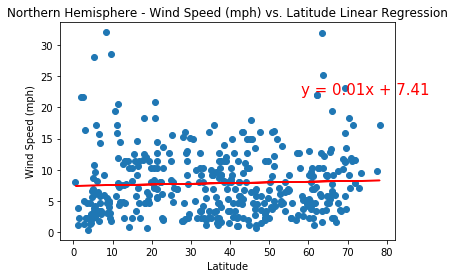

<Figure size 432x288 with 0 Axes>

In [30]:

# Call an function #1
linear_agression(northern_hem["Lat"], northern_hem["Wind Speed"])

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

# Save the figure
plt.savefig("Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

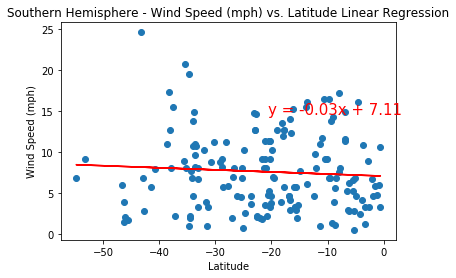

<Figure size 432x288 with 0 Axes>

In [31]:
linear_agression(southern_hem["Lat"], southern_hem["Wind Speed"])

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

# Save the figure
plt.savefig("Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")